# Importing libraries

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
files.upload()

In [32]:
df=pd.read_csv("/content/insurance.csv")

# Information of dataset

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Preprocessing

*This part is the same as the previous project in the sklearn repo*

In [7]:
encode=LabelEncoder()

In [8]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
df["sex"]=encode.fit_transform(df["sex"])
df["smoker"]=encode.fit_transform(df["smoker"])
df["region"]=encode.fit_transform(df["region"])

In [10]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [34]:
df=df[df["charges"]<50000]

In [35]:
df=df[df["bmi"]<47]

In [36]:
mms=MinMaxScaler()

In [37]:
xtrain, xtest, ytrain, ytest= train_test_split(df.drop("charges",axis=1), df["charges"], test_size=.2)

In [38]:
xtrain = mms.fit_transform(xtrain)
xtest= mms.transform(xtest)

In [42]:
es=EarlyStopping(patience=20)

# Model

In [85]:
model= Sequential()

model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

model.compile(loss="mse", optimizer="adam", metrics=["mae"])

model.fit(xtrain,ytrain, validation_split=.1, callbacks=[es], epochs=1500)

Epoch 1/1500
30/30 [==============================] - 1s 9ms/step - loss: 313584768.0000 - mae: 13162.5879 - val_loss: 335538976.0000 - val_mae: 14110.2617
Epoch 2/1500
30/30 [==============================] - 0s 4ms/step - loss: 313485408.0000 - mae: 13159.2881 - val_loss: 335192128.0000 - val_mae: 14099.2637
Epoch 3/1500
30/30 [==============================] - 0s 4ms/step - loss: 311954368.0000 - mae: 13107.0703 - val_loss: 330238656.0000 - val_mae: 13939.5342
Epoch 4/1500
30/30 [==============================] - 0s 3ms/step - loss: 295460896.0000 - mae: 12558.4297 - val_loss: 289393440.0000 - val_mae: 12547.7285
Epoch 5/1500
30/30 [==============================] - 0s 4ms/step - loss: 216088992.0000 - mae: 9750.8623 - val_loss: 147569840.0000 - val_mae: 8123.4434
Epoch 6/1500
30/30 [==============================] - 0s 4ms/step - loss: 109212536.0000 - mae: 8064.9858 - val_loss: 101548488.0000 - val_mae: 8272.8857
Epoch 7/1500
30/30 [==============================] - 0s 3ms/step - 

In [86]:
hist=pd.DataFrame(model.history.history)

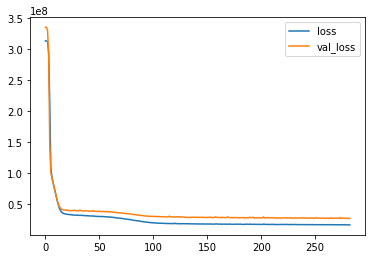

In [87]:
hist[["loss", "val_loss"]].plot()

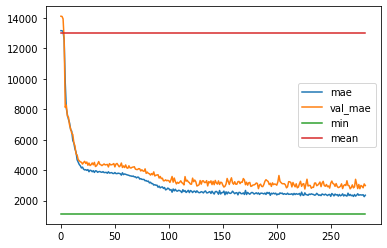

In [88]:
hist[["mae", "val_mae"]].plot()
sns.lineplot(y=[min(df["charges"]) for p in range(len(hist))], x=range(len(hist)))
sns.lineplot(y=[sum(df["charges"])/len(df["charges"]) for p in range(len(hist))], x=range(len(hist)))
plt.legend(["mae","val_mae","min","mean"])

In [89]:
prediction=np.argmax(model.predict(xtest), axis=-1)

In [90]:
mean_squared_error(prediction, ytest)**.5

16212.876994833814